In this notebook, we are detecting the Dass using wearable device dataset and mobile sensor dataset. First we will start by uploading dataset. Here, I'll upload wearable device dataset of 2nd participate, however, I will be using 3 participate wearable dataset. These dataset have 17th Participate.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from google.colab import files
 
uploaded = files.upload()


Saving Wearable_device_S2.csv to Wearable_device_S2.csv


We have uploaded the dataset.

In [ ]:
import io
wearable_S2 = pd.read_csv(io.BytesIO(uploaded['Wearable_device_S2.csv']))
wearable_S2

,A - axis,B - axis,C - axis,BVP,EDA,Heart_rate,IBI average beat,IBI,Temp
0,29,-6,55,0.00,0.000000,106.50,15.203821,0.890666,38.18
1,28,-6,55,0.00,0.328021,95.33,15.985107,0.781286,38.18
2,28,-6,55,0.00,0.410026,90.25,16.797644,0.812537,38.18
3,28,-6,55,0.00,0.433090,88.20,17.578930,0.781286,38.18
4,28,-6,56,0.00,0.444622,86.83,18.282087,0.703157,35.05
...,...,...,...,...,...,...,...,...,...
3452,64,5,26,342.79,1.526500,65.72,7851.781287,0.953169,35.63
3453,54,4,21,316.14,1.523938,65.62,7852.671952,0.890666,35.63
3454,63,3,20,278.88,1.521375,65.53,7853.656373,0.984420,35.63
3455,57,4,19,232.14,1.517531,65.48,7854.672044,1.015671,35.63


In the next step, we will start with Data Cleaning.

In [ ]:
wearable_S2.dtypes

A - axis              int64
B - axis              int64
C - axis              int64
BVP                 float64
EDA                 float64
Heart_rate          float64
IBI average beat    float64
IBI                 float64
Temp                float64
dtype: object

We will check for null values

In [ ]:
wearable_S2.isna().sum()

A - axis            0
B - axis            0
C - axis            0
BVP                 0
EDA                 0
Heart_rate          0
IBI average beat    0
IBI                 0
Temp                0
dtype: int64

Next step is to understand our dataset.we will be using the describe funcion for better understanding of dataset.

In [ ]:
wearable_S2.describe()

,A - axis,B - axis,C - axis,BVP,EDA,Heart_rate,IBI average beat,IBI,Temp
count,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000
mean,36.304599,-19.262366,21.673995,0.543312,1.061759,77.235701,3840.026572,0.854352,35.441067
std,25.212559,26.418972,35.112335,195.011892,0.405332,8.541841,2452.635273,0.089584,0.380963
min,-123.000000,-128.000000,-128.000000,-889.160000,0.000000,65.470000,15.203821,0.453146,34.680000
25%,27.000000,-39.000000,-6.000000,-63.580000,0.651183,71.550000,1648.106691,0.796911,35.130000
50%,30.000000,-10.000000,22.000000,7.650000,1.083061,75.520000,3451.376735,0.859414,35.470000
75%,52.000000,-6.000000,55.000000,51.060000,1.420051,79.280000,5972.304629,0.906291,35.770000
max,127.000000,69.000000,127.000000,1076.010000,1.928838,123.000000,7855.437704,1.390689,38.180000


In [ ]:
wearable_S2_2 = wearable_S2
wearable_S2_2

,A - axis,B - axis,C - axis,BVP,EDA,Heart_rate,IBI average beat,IBI,Temp
0,29,-6,55,0.00,0.000000,106.50,15.203821,0.890666,38.18
1,28,-6,55,0.00,0.328021,95.33,15.985107,0.781286,38.18
2,28,-6,55,0.00,0.410026,90.25,16.797644,0.812537,38.18
3,28,-6,55,0.00,0.433090,88.20,17.578930,0.781286,38.18
4,28,-6,56,0.00,0.444622,86.83,18.282087,0.703157,35.05
...,...,...,...,...,...,...,...,...,...
3452,64,5,26,342.79,1.526500,65.72,7851.781287,0.953169,35.63
3453,54,4,21,316.14,1.523938,65.62,7852.671952,0.890666,35.63
3454,63,3,20,278.88,1.521375,65.53,7853.656373,0.984420,35.63
3455,57,4,19,232.14,1.517531,65.48,7854.672044,1.015671,35.63


In [ ]:
wearable_S2_2 = wearable_S2_2.drop('IBI average beat', axis=1)
wearable_S2_2

,A - axis,B - axis,C - axis,BVP,EDA,Heart_rate,IBI,Temp
0,29,-6,55,0.00,0.000000,106.50,0.890666,38.18
1,28,-6,55,0.00,0.328021,95.33,0.781286,38.18
2,28,-6,55,0.00,0.410026,90.25,0.812537,38.18
3,28,-6,55,0.00,0.433090,88.20,0.781286,38.18
4,28,-6,56,0.00,0.444622,86.83,0.703157,35.05
...,...,...,...,...,...,...,...,...
3452,64,5,26,342.79,1.526500,65.72,0.953169,35.63
3453,54,4,21,316.14,1.523938,65.62,0.890666,35.63
3454,63,3,20,278.88,1.521375,65.53,0.984420,35.63
3455,57,4,19,232.14,1.517531,65.48,1.015671,35.63


In this step, we will be generating some graphs to know about dependency and non-dependency columns.

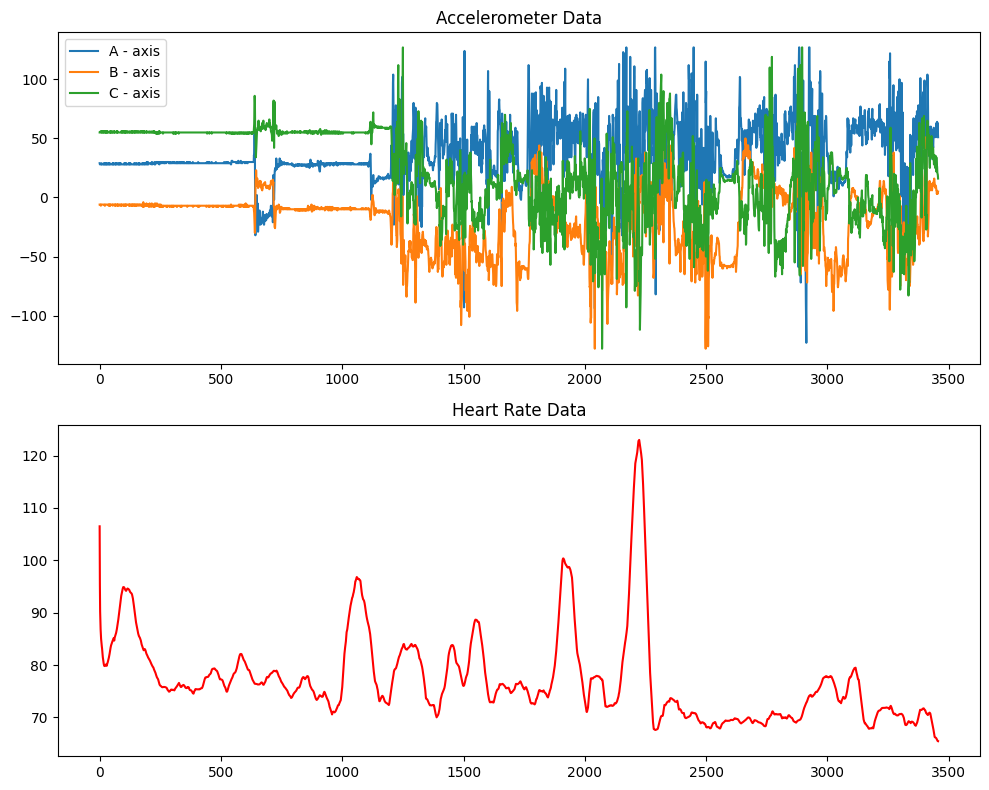

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Extract the relevant columns
acc_data = wearable_S2_2[['A - axis', 'B - axis', 'C - axis']]
hr_data = wearable_S2_2['Heart_rate']

# Plot the data
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Accelerometer plot
acc_data.plot(ax=ax[0])
ax[0].set_title('Accelerometer Data')

# Heart rate plot
hr_data.plot(ax=ax[1], color='red')
ax[1].set_title('Heart Rate Data')

plt.tight_layout()
plt.show()

Scatter plot between Heart Rate and Skin Temperature:

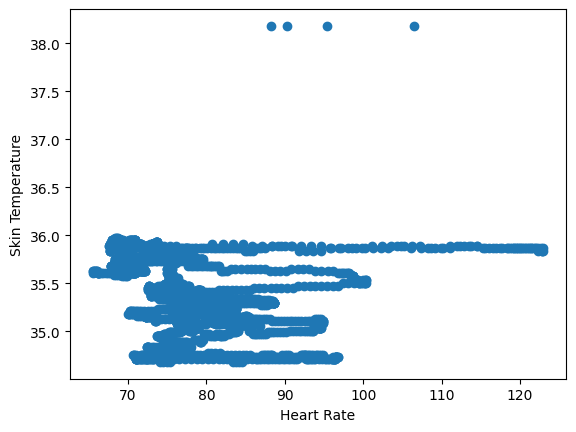

In [ ]:
plt.scatter(wearable_S2['Heart_rate'], wearable_S2['Temp'])
plt.xlabel('Heart Rate')
plt.ylabel('Skin Temperature')
plt.show()

Histogram of Glavanic Skin Response

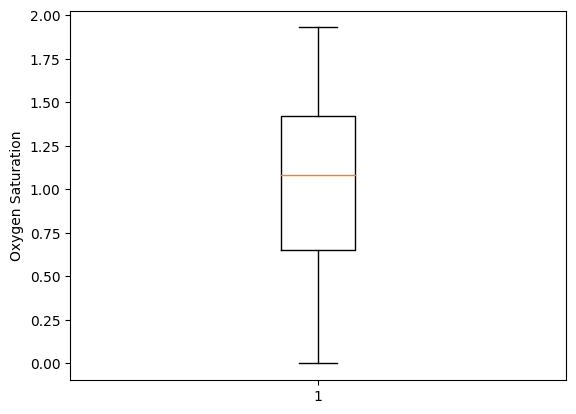

In [ ]:
plt.boxplot(wearable_S2['EDA'])
plt.ylabel('Oxygen Saturation')
plt.show()

Scatter Plot of Heart rate against BPM

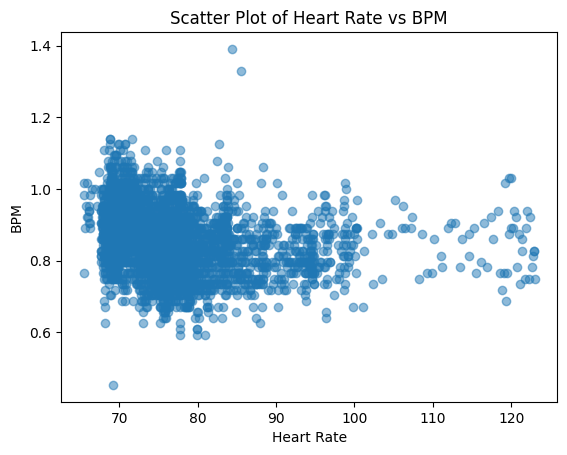

In [ ]:

# Extract the heart rate and BPM columns
hr = wearable_S2['Heart_rate']
bpm = wearable_S2['IBI']

# Create a scatter plot
plt.scatter(hr, bpm, alpha=0.5)

# Set the axis labels and title
plt.xlabel('Heart Rate')
plt.ylabel('IBI')
plt.title('Scatter Plot of Heart Rate vs IBI')

# Show the plot
plt.show()


EDA And BVP

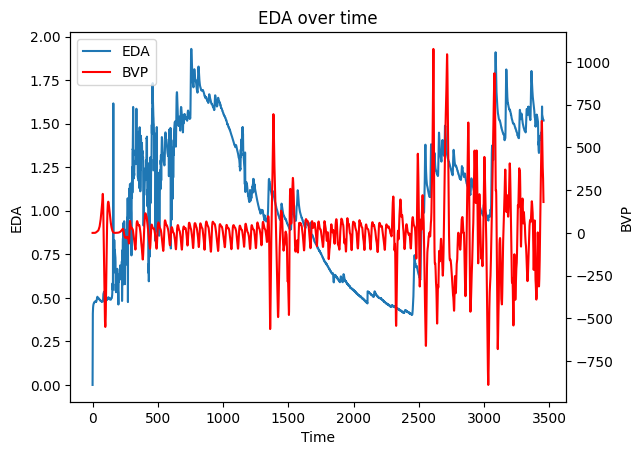

In [ ]:

# Select EDA and BPM columns
eda = wearable_S2['EDA']
bpm = wearable_S2['BVP']

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot EDA data
ax.plot(eda, label='EDA')

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('EDA')
ax.set_title('EDA over time')

# Create a second y-axis for BPM data
ax2 = ax.twinx()
ax2.plot(bpm, 'r', label='BVP')
ax2.set_ylabel('BVP')

# Add legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Display the plot
plt.show()

In [ ]:
algo_wearable_S2_RF = wearable_S2_2


Random Forest algorithm 

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Split the dataset into features (X) and target (y)
X = algo_wearable_S2_RF.drop('Heart_rate', axis=1)
y = algo_wearable_S2_RF['Heart_rate']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R^2 score:', r2)
print('MSE:', mse)


R^2 score: 0.9143958159390643
MSE: 6.941280397297685


In this step, we try to predict heart rate through SVM

In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

algo_wearable_S2_SVM_HR = wearable_S2_2


# Split the data into features (X) and target (y)
X = algo_wearable_S2_SVM_HR[['A - axis', 'B - axis', 'C - axis', 'BVP', 'EDA', 'IBI', 'temp']]
y = algo_wearable_S2_SVM_HR['Heart_rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)



KeyError: ignored

Next we have try predecting IBI

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

algo_wearable_S2 = wearable_S2_2

# Define the target and features
features = ["A - axis", "B - axis", "C - axis", "BVP", "EDA", "Heart_rate", "Temp"]

# Define the target variable
def target_category(x):
    if 0.01 <= x <= 0.5:
        return "High"
    elif 0.6 <= x <= 0.9:
        return "Normal"
    elif 0.9 <= x <= 1.3:
        return "Low"
    else:
        return "Unknown"

wearable_S2['target'] = wearable_S2['IBI'].apply(target_category)

# Split the data into training and testing sets
X = algo_wearable_S2.drop(['target', 'IBI'], axis=1)
y = algo_wearable_S2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         0
         Low       0.58      0.45      0.51       192
      Normal       0.81      0.87      0.84       500

    accuracy                           0.76       692
   macro avg       0.46      0.44      0.45       692
weighted avg       0.75      0.76      0.75       692



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

algo_wearable_S2_new = wearable_S2.copy()

# Count the number of rows in the original dataframe
original_rows = algo_wearable_S2_new.shape[0]

# Drop rows where IBI values are less than 0.1
algo_wearable_S2_new = algo_wearable_S2_new[algo_wearable_S2_new['IBI'] >= 0.1]

# Count the number of rows in the new dataframe
new_rows = algo_wearable_S2_new.shape[0]

# Calculate the number of dropped rows
dropped_rows = original_rows - new_rows

# Print the number of dropped rows
print('Dropped rows:', dropped_rows)

Dropped rows: 0


In [ ]:
algo_wearable_S2.isnull().sum()

A - axis            0
B - axis            0
C - axis            0
BVP                 0
EDA                 0
Heart_rate          0
IBI average beat    0
IBI                 0
Temp                0
target              2
dtype: int64

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define the target variable
def target_category(x):
    if 0.01 <= x <= 0.5:
        return "High"
    elif 0.6 <= x <= 0.9:
        return "Normal"
    elif 0.9 <= x <= 1.3:
        return "Low"
    else:
        return "Unknown"

# Define the target and features
target = "IBI"
features = ["A - axis", "B - axis", "C - axis", "BVP", "EDA", "Heart_rate", "Temp"]

wearable_S2['target'] = wearable_S2['IBI'].apply(target_category)

# Split the data into training and testing sets
X = wearable_S2.drop(['target', 'IBI'], axis=1)
y = wearable_S2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred, zero_division=0))



              precision    recall  f1-score   support

        High       0.00      0.00      0.00         0
         Low       0.58      0.45      0.51       192
      Normal       0.81      0.87      0.84       500

    accuracy                           0.76       692
   macro avg       0.46      0.44      0.45       692
weighted avg       0.75      0.76      0.75       692



Now we will try using linear regression algorithm

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



# Define the target variable
def target_category(x):
    if 0.01 <= x <= 0.5:
        return "High"
    elif 0.6 <= x <= 0.9:
        return "Normal"
    elif 0.9 <= x <= 1.3:
        return "Low"
    else:
        return "Unknown"

algo_wearable_S2_new['target'] = algo_wearable_S2_new['IBI'].apply(target_category)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Split the data into training and testing sets
X = algo_wearable_S2_new.drop(['target', 'IBI'], axis=1)
y = algo_wearable_S2_new['IBI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model
score = regressor.score(X_test, y_test)
print(f'R^2 Score: {score:.2f}')

R^2 Score: 0.27


WE will upload the second dataset i.e. Mobile Sensors dataset

In [ ]:
uploaded = files.upload()

Saving Mobile_Motion_S2 - Sheet1.csv to Mobile_Motion_S2 - Sheet1.csv


In [ ]:
import io
mobile_sensor = pd.read_csv(io.BytesIO(uploaded['Mobile_Motion_S2 - Sheet1.csv']))
mobile_sensor

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,Activity
0,-2.356388,-1.369780,-0.166079,-0.141136,0.979864,0.141191,0.627568,-0.759491,-0.093651,-0.061607,-0.359015,-0.039094,Downstairs
1,-2.275986,-1.376099,-0.068134,-0.147302,0.981106,0.125383,1.059839,-0.748316,-0.598052,-0.127829,-0.308194,-0.108339,Downstairs
2,-2.141971,-1.376424,0.081267,-0.162467,0.981169,0.104406,1.195799,-0.563976,-0.993648,-0.143212,-0.285857,-0.120031,Downstairs
3,-2.001378,-1.369096,0.233915,-0.182024,0.979727,0.083608,1.080322,-0.389906,-1.001087,-0.078840,-0.338324,-0.104299,Downstairs
4,-1.899788,-1.362625,0.342715,-0.195561,0.978410,0.066764,0.788869,-0.151291,-0.481068,0.076298,-0.345308,-0.072013,Downstairs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,-2.082875,-1.176387,1.502059,-0.334957,0.923224,0.188277,0.282895,0.468539,0.679139,0.248608,0.040186,-0.326994,Walking
733,-1.546414,-1.178960,1.408963,-0.381769,0.924209,-0.009310,-0.046385,-0.018076,-0.023637,-0.006063,0.009873,0.000887,Standing
734,-1.549069,-1.178564,1.406549,-0.382159,0.924058,-0.008305,-0.045361,-0.023423,-0.019351,-0.004224,0.008300,-0.000134,Standing
735,-1.551693,-1.178283,1.404278,-0.382439,0.923951,-0.007307,-0.043285,-0.028787,-0.011852,-0.006111,0.009506,0.003187,Standing


In [ ]:
mobile_sensor.describe()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,-1.511664,-1.056309,1.015720,-0.340335,0.831511,0.203300,0.025313,0.048728,0.007232,-0.004824,0.012138,-0.005464
std,1.220963,0.307126,0.763987,0.209628,0.172952,0.278880,0.398542,0.422432,0.340504,0.139850,0.220943,0.120713
min,-2.454538,-1.514225,-1.162455,-0.580324,0.556805,-0.294933,-1.452579,-1.456973,-1.819310,-0.533241,-0.523146,-0.512189
25%,-2.418042,-1.278690,0.648121,-0.535586,0.576831,-0.010447,-0.062768,-0.064132,-0.030710,-0.019463,-0.014903,-0.008624
50%,-1.794759,-1.176649,0.790220,-0.382841,0.923324,0.084800,-0.003689,0.002386,-0.000251,-0.001269,0.001990,0.002922
75%,-1.501904,-0.614844,1.449236,-0.283350,0.957639,0.611703,0.068417,0.073338,0.079769,0.014844,0.017146,0.015992
max,2.350153,-0.590535,3.132284,0.233185,0.998400,0.635986,1.836944,1.456653,1.505390,0.580879,1.684376,0.525323


In [ ]:
mobile_sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
Activity              0
dtype: int64

In [ ]:
mobile_sensor.dtypes

attitude.roll         float64
attitude.pitch        float64
attitude.yaw          float64
gravity.x             float64
gravity.y             float64
gravity.z             float64
rotationRate.x        float64
rotationRate.y        float64
rotationRate.z        float64
userAcceleration.x    float64
userAcceleration.y    float64
userAcceleration.z    float64
Activity               object
dtype: object

SVM algorithm is used to predict the activity for the subject 19.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

mobile_sensor_SVM = mobile_sensor

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(mobile_sensor_SVM.iloc[:,:-1], mobile_sensor_SVM['Activity'], test_size=0.3, random_state=42)

# Define the SVM model with regularization techniques
svm_model = SVC(C=0.1, kernel='rbf', gamma='scale')

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  Downstairs       1.00      1.00      1.00        27
     Jogging       1.00      0.83      0.91        18
     Sitting       1.00      1.00      1.00        65
    Standing       0.66      1.00      0.79        59
    Upstairs       1.00      1.00      1.00        22
     Walking       0.00      0.00      0.00        31

    accuracy                           0.85       222
   macro avg       0.78      0.81      0.78       222
weighted avg       0.77      0.85      0.80       222



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Define the Random Forest Classifier with 50 trees
rf_model = RandomForestClassifier(n_estimators=50)

# Use cross-validation to evaluate the model performance
scores = cross_val_score(rf_model, mobile_sensor.iloc[:,:-1], mobile_sensor['Activity'], cv=5)

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

# Train the model on the entire dataset
rf_model.fit(mobile_sensor.iloc[:,:-1], mobile_sensor['Activity'])

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))



Cross-validation scores: [1. 1. 1. 1. 1.]
Mean score: 1.0
              precision    recall  f1-score   support

  Downstairs       1.00      1.00      1.00        27
     Jogging       1.00      1.00      1.00        18
     Sitting       1.00      1.00      1.00        65
    Standing       1.00      1.00      1.00        59
    Upstairs       1.00      1.00      1.00        22
     Walking       1.00      1.00      1.00        31

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222



Cross validation and Random forest

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

mobile_sensor_RF_CV = mobile_sensor

# Split the data into training and testing sets
X = mobile_sensor_RF_CV.iloc[:, :-1]
y = mobile_sensor_RF_CV['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rfc, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Fit the model on the training set
rfc.fit(X_train, y_train)

# Predict on the test set
y_pred = rfc.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

Cross-validation scores: [1. 1. 1. 1. 1.]
              precision    recall  f1-score   support

  Downstairs       1.00      1.00      1.00        19
     Jogging       1.00      1.00      1.00        14
     Sitting       1.00      1.00      1.00        37
    Standing       1.00      1.00      1.00        42
    Upstairs       1.00      1.00      1.00        16
     Walking       1.00      1.00      1.00        20

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148

